In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
linear = LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)

### Import the three datasets

In [3]:
movies_data = pd.read_csv('movies.dat',sep ='::',names=['MovieID','Title','Genres'],engine='python',header=None)
movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating_data = pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating', 'Timestamp'],
                          parse_dates=['Timestamp'],engine='python',header=None)
rating_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
user_data = pd.read_csv('users.dat',sep ='::',names=['UserID','Gender','Age','occupation','zipcode'],
                          engine='python',header=None)
user_data.head()

,UserID,Gender,Age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


#### Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [6]:
#M_R = Merged data of movies and ratings
M_R = pd.merge(movies_data,rating_data,on = 'MovieID')
M_R.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [7]:
M_R.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
MovieID      1000209 non-null int64
Title        1000209 non-null object
Genres       1000209 non-null object
UserID       1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [8]:
M_R_U = pd.merge(M_R,user_data,on = 'UserID')
M_R_U.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,occupation,zipcode
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [9]:
Master_Data = M_R_U.drop(['zipcode', 'Timestamp'],axis=1)
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Gender,Age,occupation
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,F,1,10
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,F,1,10
2,150,Apollo 13 (1995),Drama,1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,F,1,10
4,527,Schindler's List (1993),Drama|War,1,5,F,1,10


In [10]:
Master_Data.describe(include = 'all')

,MovieID,Title,Genres,UserID,Rating,Gender,Age,occupation
count,1.000209e+06,1000209,1000209,1.000209e+06,1.000209e+06,1000209,1.000209e+06,1.000209e+06
unique,NaN,3706,301,NaN,NaN,2,NaN,NaN
top,NaN,American Beauty (1999),Comedy,NaN,NaN,M,NaN,NaN
freq,NaN,3428,116883,NaN,NaN,753769,NaN,NaN
mean,1.865540e+03,NaN,NaN,3.024512e+03,3.581564e+00,NaN,2.973831e+01,8.036138e+00
std,1.096041e+03,NaN,NaN,1.728413e+03,1.117102e+00,NaN,1.175198e+01,6.531336e+00
min,1.000000e+00,NaN,NaN,1.000000e+00,1.000000e+00,NaN,1.000000e+00,0.000000e+00
25%,1.030000e+03,NaN,NaN,1.506000e+03,3.000000e+00,NaN,2.500000e+01,2.000000e+00
50%,1.835000e+03,NaN,NaN,3.070000e+03,4.000000e+00,NaN,2.500000e+01,7.000000e+00
75%,2.770000e+03,NaN,NaN,4.476000e+03,4.000000e+00,NaN,3.500000e+01,1.400000e+01


In [11]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
Genres        1000209 non-null object
UserID        1000209 non-null int64
Rating        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
occupation    1000209 non-null int64
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


# Visualization

### User Age Distribution

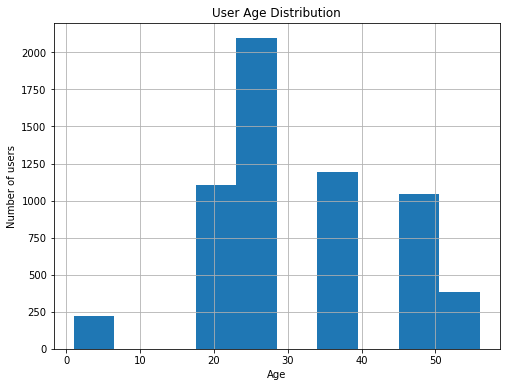

In [12]:
plt.figure(figsize = (8,6))
plt.title('User Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of users')
user_data.Age.hist()
plt.show()

### User rating of the movie “Toy Story”

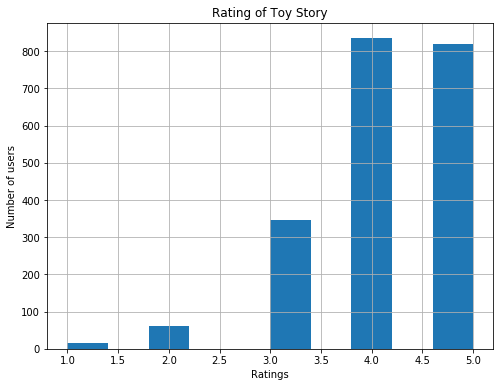

In [13]:
plt.figure(figsize = (8,6))
plt.title('Rating of Toy Story')
New_data = M_R.groupby('Title')
toy_story = New_data.get_group('Toy Story (1995)')
toy_story['Rating'].hist()
plt.xlabel('Ratings')
plt.ylabel('Number of users')
plt.show()

###  Top 25 movies by viewership rating

In [14]:
count_rating = M_R.groupby('Title')['Rating']
count_rating = count_rating.count().sort_values(ascending = False)
count_rating[:25]

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

## Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [15]:
np.where(M_R_U["UserID"] == 2696)

(array([991035, 991036, 991037, 991038, 991039, 991040, 991041, 991042,
        991043, 991044, 991045, 991046, 991047, 991048, 991049, 991050,
        991051, 991052, 991053, 991054], dtype=int64),)

In [16]:
rating_2696 = M_R_U[M_R_U['UserID'] == 2696]
rating_2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,occupation,zipcode
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


## Feature Engineering:

### Unique genres

In [17]:
movies_data['Genres'].value_counts()

Drama                                 843
Comedy                                521
Horror                                178
Comedy|Drama                          162
Comedy|Romance                        142
                                     ... 
Adventure|Animation|Film-Noir           1
Action|Drama|Sci-Fi|Thriller            1
Action|Adventure|Romance|War            1
Adventure|Children's|Drama|Musical      1
Comedy|Romance|Sci-Fi                   1
Name: Genres, Length: 301, dtype: int64

In [18]:
movies_data['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

### Genre category with a one-hot encoding ( 1 and 0)

In [19]:
movie_ratings_attained = M_R_U[[
    'Gender',
    'Age',
    'occupation',
    'Rating',
    'Genres'
]]

In [20]:
movie_ratings_attained.head()

,Gender,Age,occupation,Rating,Genres
0,F,1,10,5,Animation|Children's|Comedy
1,F,1,10,5,Animation|Children's|Musical|Romance
2,F,1,10,5,Drama
3,F,1,10,4,Action|Adventure|Fantasy|Sci-Fi
4,F,1,10,5,Drama|War


In [21]:
Genre_Var = movie_ratings_attained['Genres']
Genre_Var = Genre_Var.str.get_dummies().add_prefix('Genres_1')
movie_Genres = pd.concat([movie_ratings_attained.drop(['Genres'],axis=1), Genre_Var],axis=1)

In [22]:
movie_Genres.head()

,Gender,Age,occupation,Rating,Genres_1Action,Genres_1Adventure,Genres_1Animation,Genres_1Children's,Genres_1Comedy,Genres_1Crime,...,Genres_1Fantasy,Genres_1Film-Noir,Genres_1Horror,Genres_1Musical,Genres_1Mystery,Genres_1Romance,Genres_1Sci-Fi,Genres_1Thriller,Genres_1War,Genres_1Western
0,F,1,10,5,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,F,1,10,5,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,F,1,10,4,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,F,1,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
movie_Genres.columns

Index(['Gender', 'Age', 'occupation', 'Rating', 'Genres_1Action',
       'Genres_1Adventure', 'Genres_1Animation', 'Genres_1Children's',
       'Genres_1Comedy', 'Genres_1Crime', 'Genres_1Documentary',
       'Genres_1Drama', 'Genres_1Fantasy', 'Genres_1Film-Noir',
       'Genres_1Horror', 'Genres_1Musical', 'Genres_1Mystery',
       'Genres_1Romance', 'Genres_1Sci-Fi', 'Genres_1Thriller', 'Genres_1War',
       'Genres_1Western'],
      dtype='object')

In [24]:
movie_Genres = pd.get_dummies(movie_Genres,columns = ['Gender'])

In [25]:
movie_Genres.head()

,Age,occupation,Rating,Genres_1Action,Genres_1Adventure,Genres_1Animation,Genres_1Children's,Genres_1Comedy,Genres_1Crime,Genres_1Documentary,...,Genres_1Horror,Genres_1Musical,Genres_1Mystery,Genres_1Romance,Genres_1Sci-Fi,Genres_1Thriller,Genres_1War,Genres_1Western,Gender_F,Gender_M
0,1,10,5,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,10,5,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,10,4,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,10,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
Movie_Train_df = movie_Genres.sample(n = 60000,random_state = 0,replace = True )
Movie_Train_df.head()

,Age,occupation,Rating,Genres_1Action,Genres_1Adventure,Genres_1Animation,Genres_1Children's,Genres_1Comedy,Genres_1Crime,Genres_1Documentary,...,Genres_1Horror,Genres_1Musical,Genres_1Mystery,Genres_1Romance,Genres_1Sci-Fi,Genres_1Thriller,Genres_1War,Genres_1Western,Gender_F,Gender_M
985772,56,7,3,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
305711,25,4,3,1,1,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
435829,35,1,5,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117952,25,17,4,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
963395,50,17,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [27]:
Movie_Train_df.columns

Index(['Age', 'occupation', 'Rating', 'Genres_1Action', 'Genres_1Adventure',
       'Genres_1Animation', 'Genres_1Children's', 'Genres_1Comedy',
       'Genres_1Crime', 'Genres_1Documentary', 'Genres_1Drama',
       'Genres_1Fantasy', 'Genres_1Film-Noir', 'Genres_1Horror',
       'Genres_1Musical', 'Genres_1Mystery', 'Genres_1Romance',
       'Genres_1Sci-Fi', 'Genres_1Thriller', 'Genres_1War', 'Genres_1Western',
       'Gender_F', 'Gender_M'],
      dtype='object')

In [28]:
x = Movie_Train_df.drop('Rating',axis = 1)
y = Movie_Train_df['Rating']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [30]:
x_train

,Age,occupation,Genres_1Action,Genres_1Adventure,Genres_1Animation,Genres_1Children's,Genres_1Comedy,Genres_1Crime,Genres_1Documentary,Genres_1Drama,...,Genres_1Horror,Genres_1Musical,Genres_1Mystery,Genres_1Romance,Genres_1Sci-Fi,Genres_1Thriller,Genres_1War,Genres_1Western,Gender_F,Gender_M
627325,45,7,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
635065,25,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
349631,25,4,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
195350,35,17,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
659604,25,7,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493575,45,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
958196,50,8,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
843871,56,13,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
272891,25,2,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
linear_reg = LinearRegression()

In [32]:
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_Predict = linear_reg.predict(x_test)

# Evaluation

In [34]:
print('y-intercept: ',linear_reg.intercept_)

y-intercept:  3.3746911766183443


In [35]:
print('Beta coefficients: ',linear_reg.coef_)

Beta coefficients:  [ 0.00435029  0.00152164 -0.11395642  0.00041257  0.3810442  -0.27397919
 -0.02053325  0.10850881  0.36221838  0.21939292  0.08027637  0.41040703
 -0.26752318  0.14245816  0.01583469 -0.02397802 -0.01088833  0.06154512
  0.2912171   0.12143977  0.0222789  -0.0222789 ]


In [36]:
print('Mean Abs Error  MAE: ',metrics.mean_absolute_error(y_test, y_Predict))

Mean Abs Error  MAE:  0.908693081460178


In [37]:
print('Mean Sq Error  MSE: ',metrics.mean_squared_error(y_test, y_Predict))

Mean Sq Error  MSE:  1.2164471310555791


In [38]:
print('Root Mean Sq Error RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_Predict)))

Root Mean Sq Error RMSE: 1.1029266208844444


In [39]:
print('r2 value: ',metrics.r2_score(y_test, y_Predict))

r2 value:  0.03355252787484353


In [40]:
print("Age, and Occupation are the main features affecting the ratings for the movies")

Age, and Occupation are the main features affecting the ratings for the movies


In [41]:
x_train.dtypes

Age                    int64
occupation             int64
Genres_1Action         int64
Genres_1Adventure      int64
Genres_1Animation      int64
Genres_1Children's     int64
Genres_1Comedy         int64
Genres_1Crime          int64
Genres_1Documentary    int64
Genres_1Drama          int64
Genres_1Fantasy        int64
Genres_1Film-Noir      int64
Genres_1Horror         int64
Genres_1Musical        int64
Genres_1Mystery        int64
Genres_1Romance        int64
Genres_1Sci-Fi         int64
Genres_1Thriller       int64
Genres_1War            int64
Genres_1Western        int64
Gender_F               uint8
Gender_M               uint8
dtype: object

In [42]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_Predict})
prediction_df.head()

,Test,Prediction
373247,3,3.529065
328191,4,3.640616
18703,5,3.419410
575400,1,3.219193
229257,5,3.425916
